### Q1) Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [1]:
# Solution 1

# importing  pandas lib as pd
import pandas as pd
  
# Loading the dataset into a pandas dataframe
survey = pd.read_excel('Political Survey Data.xlsx',sheet_name = 'Data')

In [2]:
# Checking the dataset
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [3]:
# Checking Data description
survey_description = pd.read_excel('Political Survey Data.xlsx',sheet_name = 'Description')
survey_description

,Column,Description
0,response_id,Unique id for each sample (respondent).
1,collection_date,Date on which the sample was collected.
2,urban_rural,Whether the respodent belongs to a rural or ur...
3,education,The education qualitfication of the repondent
4,income,Income of the respondent.
5,Vote_Now,"If elections are held today, which party will ..."
6,Past_Vote,Which party did the respondent vote for in the...
7,CM_satisfaction,How satisfied is the respondent with the perfo...
8,MLA_satisfaction,How satisfied is the respondent with the perfo...
9,age,The age of the respondent.


In [4]:
# checking the data types of all the columns
survey.dtypes

response_id                  int64
collection_date     datetime64[ns]
urban_rural                 object
education                   object
income                      object
Vote_Now                    object
Past_Vote                   object
CM_satisfaction             object
MLA_satisfaction            object
age                         object
gender                      object
assembly_no                  int64
category                    object
weight                     float64
dtype: object

Here, age column's data type is object. For the analysis, it should be changed to integer. So here we will inspect the "age" column

In [5]:
# Checking the values of 'age' column
survey['age'].unique()

array([26, 34, 25, 36, 22, 38, 23, 42, 51, 29, 24, 30, 39, 37, 19, 44, 53,
       32, 21, 18, 20, 27, 48, 28, 45, 74, 35, 31, 70, 40, 49, 46, 43, 41,
       33, 58, '24ko', 56, 50, 55, 54, 62, 60, 59, 47, 61, 52, 66, 57, 67,
       65, 71, 63, 64, 68, 69, 99, 72, 75, 76], dtype=object)

In [6]:
# Changing the age value '24ko' to 24 (There seems to be a mistake)
survey['age'] = survey['age'].replace(['24ko'],24)
survey['age'].unique()

array([26, 34, 25, 36, 22, 38, 23, 42, 51, 29, 24, 30, 39, 37, 19, 44, 53,
       32, 21, 18, 20, 27, 48, 28, 45, 74, 35, 31, 70, 40, 49, 46, 43, 41,
       33, 58, 56, 50, 55, 54, 62, 60, 59, 47, 61, 52, 66, 57, 67, 65, 71,
       63, 64, 68, 69, 99, 72, 75, 76], dtype=int64)

In [7]:
# checking the data types 'age' column
survey.dtypes

response_id                  int64
collection_date     datetime64[ns]
urban_rural                 object
education                   object
income                      object
Vote_Now                    object
Past_Vote                   object
CM_satisfaction             object
MLA_satisfaction            object
age                          int64
gender                      object
assembly_no                  int64
category                    object
weight                     float64
dtype: object

So, we can see that 'age' column's datatype is changed to int64. We will now go ahead with our analysis

### Q2) How many samples were collected on each day?

In [8]:
#  Solution 2
#  No of samples collected on each day
survey.collection_date.value_counts()

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

### Q3) What proportion of the total respondents were aged less than 45?

In [9]:
# Total no of respondents who were aged less than 45
less_than_45 =survey[survey["age"] < 45].shape[0]
less_than_45

6399

In [10]:
# Total no of total respondents 
Total_no  =survey.shape[0]
Total_no 

6867

In [11]:
# Solution 3
#proportion of the total respondents were aged less than 45

less_than_45/Total_no 

0.9318479685452162

In [12]:
#percentage of the total respondents were aged less than 45
(less_than_45/Total_no)*100

93.18479685452162

### Q4) Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+.

In [13]:
# Solution 4
# Creating a new column in the dataframe “age_group”

survey['age_group'] = pd.cut(x=survey['age'], bins=[18, 25, 40, 55,100])
survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,"(25, 40]"
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,"(25, 40]"
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,"(18, 25]"
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,"(25, 40]"
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,"(18, 25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,"(18, 25]"
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780,"(25, 40]"
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926,"(18, 25]"
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137,"(18, 25]"


### Q5) How many samples were collected for each age-group? Which age-group had the most samples?

In [14]:
# Solution 5
# Samples collected for each age-group
survey.age_group.value_counts()

(25, 40]     3423
(18, 25]     2567
(40, 55]      644
(55, 100]     108
Name: age_group, dtype: int64

So, we can see that 25-40  age-group has the most samples

### Q6) What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?

In [15]:
# Total no of respondents that had opted for the RJD party in both the Vote_Now and the Past_Vote questions
RJD_respondents =survey[(survey["Vote_Now"]== 'RJD') & (survey["Past_Vote"]== 'RJD') ].shape[0]
RJD_respondents

811

In [16]:
# Solutions 6
# Proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions

RJD_respondents/Total_no 

0.1181010630551915

In [17]:
# Percentage of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions
(RJD_respondents/Total_no)*100

11.810106305519149

### Q7) For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

In [18]:
# Creating a dataframe 'CM_Fully_Satisfied' which has only that respondents who were fully satisfied with the performance of CM
CM_Fully_Satisfied= survey[survey["CM_satisfaction"]=="Fully Satisfied"]
CM_Fully_Satisfied

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,"(18, 25]"
8,9,2020-08-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477,"(18, 25]"
14,15,2020-08-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,Male,199,Gen,0.226477,"(18, 25]"
17,18,2020-08-24,Urban,Graduate,"₹ 5,000 - ₹ 10,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,39,Male,200,Gen,0.181242,"(25, 40]"
28,29,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,Male,205,BC,1.337935,"(40, 55]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,6852,2020-09-01,Urban,Graduate,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Satisfied,Somewhat Dissatisfied,66,Male,165,Gen,0.300990,"(55, 100]"
6852,6853,2020-09-01,Rural,Graduate,"₹ 10,000 - ₹ 20,000",Undecided,BJP,Fully Satisfied,Fully Satisfied,28,Male,149,SC,0.983441,"(25, 40]"
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,"(18, 25]"
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137,"(18, 25]"


In [19]:
# Checking the no of respondents who were fully satisfied with the performance of CM for each day of saple collection
CM_Fully_Satisfied.collection_date.value_counts()

2020-08-24    146
2020-08-25     95
2020-08-28     92
2020-09-01     75
2020-08-29     73
2020-08-30     65
2020-08-31     62
2020-08-26     59
2020-08-27     54
Name: collection_date, dtype: int64

In [20]:
# Solution 7
# For each day of sample collection, the proportion of respondents who were fully satisfied with the performance of the CM
(CM_Fully_Satisfied.collection_date.value_counts())/(survey.collection_date.value_counts())

2020-08-24    0.098715
2020-08-25    0.095190
2020-08-26    0.098662
2020-08-27    0.081203
2020-08-28    0.120894
2020-08-29    0.117742
2020-08-30    0.111684
2020-08-31    0.111311
2020-09-01    0.123558
Freq: D, Name: collection_date, dtype: float64

In [21]:
# For each day of sample collection, the percentage of respondents who were fully satisfied with the performance of the CM
(CM_Fully_Satisfied.collection_date.value_counts())/(survey.collection_date.value_counts())*100

2020-08-24     9.871535
2020-08-25     9.519038
2020-08-26     9.866221
2020-08-27     8.120301
2020-08-28    12.089356
2020-08-29    11.774194
2020-08-30    11.168385
2020-08-31    11.131059
2020-09-01    12.355848
Freq: D, Name: collection_date, dtype: float64

### Q8) In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [22]:
# Creating a dataframe 'MLA_Fully_Dissatisfied' which has only that respondents who were fully Dissatisfied with the performance of MLA
MLA_Fully_Dissatisfied= survey[survey["MLA_satisfaction"]=="Fully Dissatisfied"]
MLA_Fully_Dissatisfied

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,"(25, 40]"
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,"(25, 40]"
5,6,2020-08-24,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,Male,178,Gen,0.382603,"(25, 40]"
6,7,2020-08-24,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,Male,172,BC,0.521283,"(25, 40]"
8,9,2020-08-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477,"(18, 25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,6856,2020-09-01,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",NOTA,JD(U),Fully Dissatisfied,Fully Dissatisfied,30,Male,241,EBC,0.174156,"(25, 40]"
6857,6858,2020-09-01,Rural,12th Pass,"BPL/Below ₹ 5,000",RJJP,BJP,Fully Dissatisfied,Fully Dissatisfied,22,Male,168,Gen,0.085758,"(18, 25]"
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,"(18, 25]"
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780,"(25, 40]"


In [23]:
# Checking the no of respondents who were fully disssatisfied with the performance of MLA for each day of saple collection
MLA_Fully_Dissatisfied.collection_date.value_counts()

2020-08-24    887
2020-08-25    630
2020-08-28    462
2020-08-27    403
2020-09-01    385
2020-08-30    361
2020-08-26    353
2020-08-29    350
2020-08-31    321
Name: collection_date, dtype: int64

In [24]:
# Solution 8
# For each day of sample collection, the proportion of respondents who were fully disssatisfied with the performance of the MLA
Proportion_MLA_Fully_Dissatisfied=(MLA_Fully_Dissatisfied.collection_date.value_counts())/(survey.collection_date.value_counts())
Proportion_MLA_Fully_Dissatisfied

2020-08-24    0.599730
2020-08-25    0.631263
2020-08-26    0.590301
2020-08-27    0.606015
2020-08-28    0.607096
2020-08-29    0.564516
2020-08-30    0.620275
2020-08-31    0.576302
2020-09-01    0.634267
Freq: D, Name: collection_date, dtype: float64

In [25]:
#creating a datafarme for creating lineplot
data = {'Date': ['2020-08-24','2020-08-25','2020-08-26','2020-08-27','2020-08-28','2020-08-29','2020-08-30','2020-08-31','2020-09-01'],
        'Proportion': [0.599730,0.631263,0.590301,0.606015,0.607096,0.564516,0.620275,0.576302,0.634267]
       }
Proportion_MLA_Fully_Dissatisfied1 = pd.DataFrame(data,columns=['Date','Proportion'])


Proportion_MLA_Fully_Dissatisfied1

,Date,Proportion
0,2020-08-24,0.599730
1,2020-08-25,0.631263
2,2020-08-26,0.590301
3,2020-08-27,0.606015
4,2020-08-28,0.607096
5,2020-08-29,0.564516
6,2020-08-30,0.620275
7,2020-08-31,0.576302
8,2020-09-01,0.634267


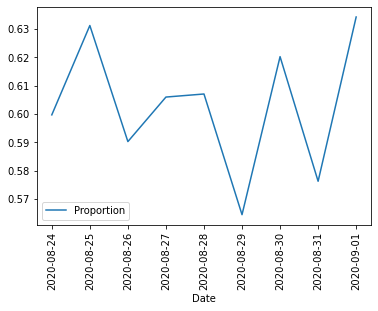

In [26]:
# Solution 8
#Create a line plot of the result with date on x-axis and proportions on the y-axis.
import matplotlib.pyplot as plt  # importing the matplotlib for creating lineplot

Proportion_MLA_Fully_Dissatisfied1.plot(x ='Date', y='Proportion', kind = 'line')
plt.xticks(rotation = 90)
plt.show()

### Q9) Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [27]:
# Solution 9
#Creating a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.
pivot_1= survey.pivot_table(index="Past_Vote", columns="Vote_Now",aggfunc="count")
pivot_1

CM_satisfaction                                              \
Vote_Now                 AAP AIMIM     BJP  BSP  HAM   INC JAP(L)  JD(U)   
Past_Vote                                                                  
BJP                      7.0   1.0  1630.0  3.0  5.0  42.0  101.0  110.0   
BSP                      NaN   1.0     2.0  5.0  NaN   1.0    NaN    NaN   
Did not vote             8.0   5.0   231.0  2.0  1.0  22.0   41.0   69.0   
HAM                      2.0   NaN    25.0  NaN  1.0   NaN    3.0    2.0   
INC                      NaN   6.0     6.0  NaN  NaN  57.0   10.0    9.0   
JAP(L)                   NaN   NaN     4.0  NaN  NaN   NaN   35.0    NaN   
JD(U)                    6.0  10.0   254.0  2.0  2.0  45.0   72.0  279.0   
LJP                      NaN   NaN    76.0  1.0  NaN   4.0    3.0    6.0   
Left Front               NaN   1.0     2.0  NaN  NaN   1.0    NaN    NaN   
NOTA                     NaN   1.0    29.0  1.0  NaN   9.0    7.0    7.0   
Others                   1.0   5.0    45.0  1.0  1.0   4.0    7.0    4.0   
RJD                      3.0   7.0    46.0  NaN  1.0  31.0   31.0   39.0   
RLSP                     NaN   NaN    17.0  NaN  NaN   NaN    3.0    NaN   
VIP                      NaN   NaN     NaN  NaN  NaN   NaN    NaN    1.0   

                               ... weight                                   \
Vote_Now       LJP Left Front  ...    LJP Left Front   NOTA Others Plurals   
Past_Vote                      ...                                           
BJP           44.0       13.0  ...   44.0       13.0  194.0   32.0    87.0   
BSP            NaN        NaN  ...    NaN        NaN    NaN    NaN     NaN   
Did not vote  10.0       16.0  ...   10.0       16.0   83.0   11.0    51.0   
HAM            2.0        NaN  ...    2.0        NaN    4.0    NaN     NaN   
INC            NaN        3.0  ...    NaN        3.0    6.0    3.0     3.0   
JAP(L)         NaN        NaN  ...    NaN        NaN    NaN    1.0     NaN   
JD(U)         29.0        9.0  ...   29.0        9.0   90.0   18.0    43.0   
LJP            9.0        2.0  ...    9.0        2.0    3.0    NaN     2.0   
Left Front     NaN       18.0  ...    NaN       18.0    1.0    1.0     NaN   
NOTA           3.0        5.0  ...    3.0        5.0   46.0    7.0    11.0   
Others         1.0        4.0  ...    1.0        4.0   10.0    6.0     8.0   
RJD            4.0        9.0  ...    4.0        9.0   18.0    8.0    10.0   
RLSP           NaN        NaN  ...    NaN        NaN    3.0    NaN     2.0   
VIP            NaN        NaN  ...    NaN        NaN    NaN    NaN     NaN   

                                                 
Vote_Now        RJD  RJJP  RLSP Undecided   VIP  
Past_Vote                                        
BJP           370.0  88.0  24.0      62.0  10.0  
BSP             NaN   NaN   NaN       NaN   NaN  
Did not vote  195.0  20.0   3.0      31.0   5.0  
HAM             6.0   4.0   NaN       1.0   NaN  
INC           100.0   1.0   2.0       7.0   NaN  
JAP(L)          2.0   NaN   NaN       NaN   NaN  
JD(U)         435.0  13.0  25.0      36.0   6.0  
LJP            17.0   1.0   NaN       1.0   NaN  
Left Front      4.0   NaN   1.0       NaN   1.0  
NOTA           27.0   5.0   4.0       5.0   NaN  
Others         21.0   7.0   1.0       6.0   NaN  
RJD           811.0   1.0  10.0      14.0   4.0  
RLSP            8.0   2.0  12.0       1.0   1.0  
VIP             NaN   NaN   NaN       NaN   1.0  

[14 rows x 234 columns]

### Q10) Repeat the above question with the cell values as the sum of “weight”.

In [28]:
# Solution 10
# Repeating the above question with the cell values as the sum of “weight”
pivot_2= survey.pivot_table(index="Past_Vote", columns="Vote_Now", values="weight", aggfunc="sum")
pivot_2

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


### Q11) Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.

In [29]:
# Solution 11
# Creating a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group

age_group_df= survey.groupby(["age_group"])["age_group"].count()
age_group_df

age_group
(18, 25]     2567
(25, 40]     3423
(40, 55]      644
(55, 100]     108
Name: age_group, dtype: int64

In [30]:
# Creating the dataframe for merging in Question 13

df1= {'age_group': ["18-25", "25-40","40-55","40-55"],'count of total samples': [2567,3423,644,108]}

age_group_df1 = pd.DataFrame(df1, columns = ['age_group', 'count of total samples'])

age_group_df1

,age_group,count of total samples
0,18-25,2567
1,25-40,3423
2,40-55,644
3,40-55,108


### Q12) Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [31]:
# Creating a dataframe for the samples that opted for the JD(U) party in Vote_Now
JDU_df= survey[survey["Vote_Now"]== "JD(U)"]
JDU_df

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,"(18, 25]"
13,14,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",JD(U),BJP,Somewhat Satisfied,Fully Dissatisfied,29,Male,184,Gen,0.275509,"(25, 40]"
28,29,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,Male,205,BC,1.337935,"(40, 55]"
29,30,2020-08-24,Urban,Professional Education,"₹ 1,50,000 & above",JD(U),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,26,Male,172,BC,0.405708,"(25, 40]"
59,60,2020-08-24,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,48,Male,171,BC,2.824391,"(40, 55]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,6770,2020-08-31,Rural,12th Pass,"₹ 80,000 - ₹ 1,50,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,46,Male,166,BC,3.233006,"(40, 55]"
6787,6788,2020-09-01,Rural,10th Pass,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,Male,144,SC,4.741094,"(55, 100]"
6829,6830,2020-09-01,Urban,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),JD(U),Fully Satisfied,Somewhat Satisfied,48,Male,146,EBC,6.328899,"(40, 55]"
6843,6844,2020-09-01,Urban,Post - Graduation,"₹ 20,000 - ₹ 30,000",JD(U),JD(U),Fully Satisfied,Fully Satisfied,24,Male,241,BC,0.492241,"(18, 25]"


In [32]:
# Solution 12
# Creating a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.
JDU_age_group= JDU_df.groupby(["age_group"])["age_group"].count()
JDU_age_group

age_group
(18, 25]     199
(25, 40]     245
(40, 55]      55
(55, 100]     10
Name: age_group, dtype: int64

In [33]:
# Creating the dataframe for merging in Question 13
df2= {'age_group': ["18-25", "25-40","40-55","40-55"],'count of total samples for each age_group that opted for the JD(U)': [199,245,55,10]}

JDU_age_group1 = pd.DataFrame(df2, columns = ['age_group', 'count of total samples for each age_group that opted for the JD(U)'])

JDU_age_group1

,age_group,count of total samples for each age_group that opted for the JD(U)
0,18-25,199
1,25-40,245
2,40-55,55
3,40-55,10


### Q13) Join/Merge the two dataframes from questions 11 and 12 with the common column as age_group.

In [34]:
# Solution 13
# Merging the two dataframes from questions 11 and 12 with the common column as age_group.
merged_df = pd.merge(age_group_df1, JDU_age_group1, on=["age_group"])
merged_df

,age_group,count of total samples,count of total samples for each age_group that opted for the JD(U)
0,18-25,2567,199
1,25-40,3423,245
2,40-55,644,55
3,40-55,644,10
4,40-55,108,55
5,40-55,108,10
